In [6]:
import numpy as np 
import pandas as pd

df = pd.read_csv("Reactsniffer validation - Responses.csv")
df

,date/hour,After reading the Informed Consent Form,React experience time,What is your course?,PU1,PU2,PU3,PU4,PU5,PU6,PU7,PU8,PU9,PEU1,PEU2,PEU3,PEU4,SFU1,SFU2
0,22/11/2023 14:40:43,I declare that I agree to participate in the r...,Between 1 and 3 years,Computer Science,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,Agree
1,22/11/2023 14:55:45,I declare that I agree to participate in the r...,Between 1 and 3 years,Computer Science,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Agree,Strongly agree,Strongly agree
2,23/11/2023 12:31:22,I declare that I agree to participate in the r...,Between 1 and 3 years,Computer Science,Agree,Agree,Agree,Strongly agree,Agree,Agree,Strongly agree,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Disagree
3,23/11/2023 12:49:10,I declare that I agree to participate in the r...,Between 1 and 3 years,Software Engineering,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Agree,Agree,Agree
4,23/11/2023 13:55:08,I declare that I agree to participate in the r...,Between 1 and 3 years,Software Engineering,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral
5,23/11/2023 19:07:27,I declare that I agree to participate in the r...,Between 1 and 3 years,Computer Science,Strongly agree,Strongly agree,Agree,Agree,Neutral,Neutral,Neutral,Agree,Strongly agree,Agree,Agree,Agree,Agree,Agree,Neutral
6,24/11/2023 01:24:24,I declare that I agree to participate in the r...,Less than 1 year,Software Engineering,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Agree
7,24/11/2023 15:56:15,I declare that I agree to participate in the r...,Less than 1 year,Software Engineering,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Agree,Neutral
8,24/11/2023 22:00:01,I declare that I agree to participate in the r...,Between 1 and 3 years,Software Engineering,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Disagree,Disagree
9,24/11/2023 23:17:49,I declare that I agree to participate in the r...,Between 3 and 5 years,Software Engineering,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree


In [7]:
df = df.drop(['date/hour', 'After reading the Informed Consent Form', 'React experience time', 'What is your course?'], axis=1)

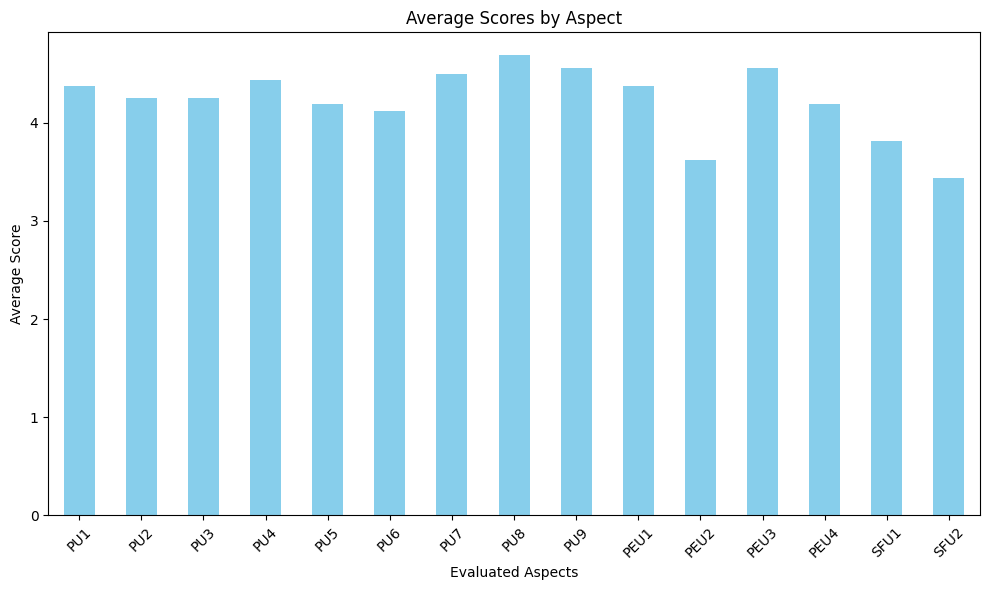

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

likert_mapping = {
    'Strongly disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly agree': 5
}

df_numeric = df.replace(likert_mapping)

mean_by_aspect = df_numeric.mean()

plt.figure(figsize=(10, 6))
mean_by_aspect.plot(kind='bar', color='skyblue')

plt.xlabel('Evaluated Aspects')
plt.ylabel('Average Score')
plt.title('Average Scores by Aspect')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

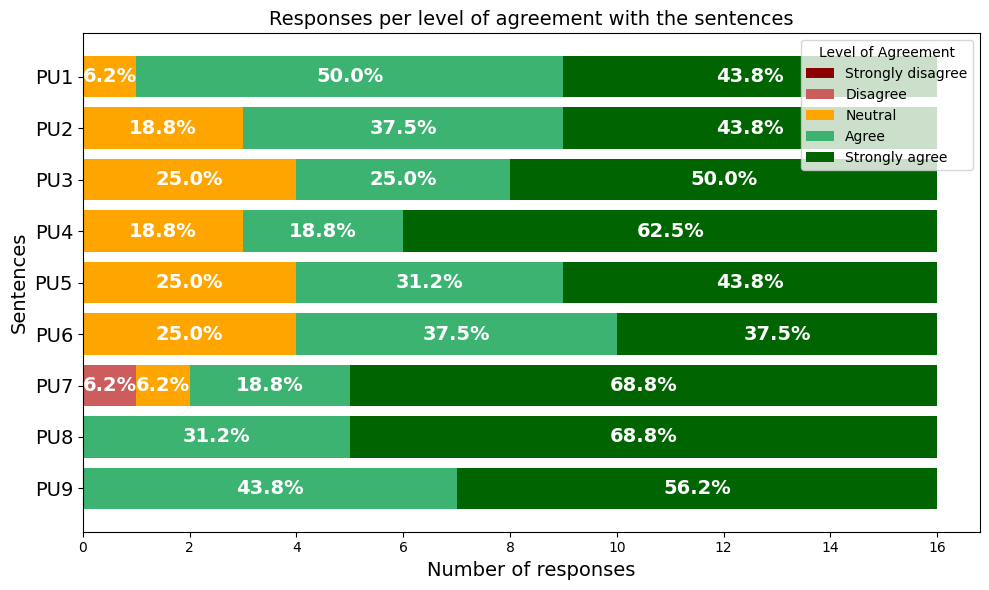

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

colors = {
    'Strongly disagree': 'darkred',
    'Disagree': 'indianred',
    'Neutral': 'orange',
    'Agree': 'mediumseagreen',
    'Strongly agree': 'darkgreen'
}

cols_sentences = df.loc[:, 'PU1':'PU9']

total_counts = []

for col in cols_sentences.columns:
    responses_count = cols_sentences[col].value_counts().reindex(colors.keys(), fill_value=0)
    total_counts.append(responses_count.values.sum())

plt.figure(figsize=(10, 6))

for i, total_count in enumerate(total_counts):
    left = 0
    for label, color in colors.items():
        count = cols_sentences.iloc[:, i].value_counts().get(label, 0)
        plt.barh(i, count, color=color, left=left, label=label if i == 0 else "", linewidth=0.5)
        
        if count > 0:
            pct = (count / total_count) * 100
            plt.text(left + count / 2, i, f'{pct:.1f}%', ha='center', va='center', color='white', weight='bold', fontsize=14)
        
        left += count if count is not None else 0

plt.xlabel('Number of responses', fontsize=14)
plt.ylabel('Sentences', fontsize=14)
plt.title('Responses per level of agreement with the sentences', fontsize=14)
plt.yticks(range(len(cols_sentences.columns)), cols_sentences.columns, fontsize=14)
plt.legend(title='Level of Agreement')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('perceived_usefulness.png')
plt.show()

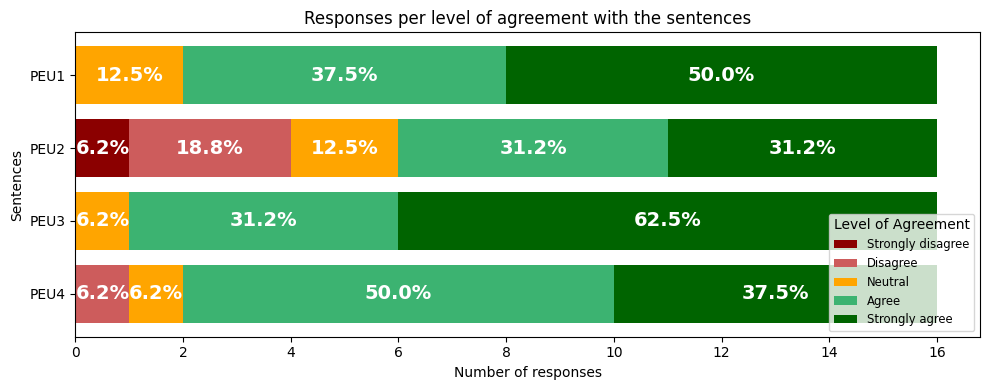

In [10]:
cols_sentences = df.loc[:, 'PEU1':'PEU4']

total_counts = []

for col in cols_sentences.columns:
    responses_count = cols_sentences[col].value_counts().reindex(colors.keys(), fill_value=0)
    total_counts.append(responses_count.values.sum())

plt.figure(figsize=(10, len(cols_sentences.columns) * 1))

for i, total_count in enumerate(total_counts):
    left = 0
    for label, color in colors.items():
        count = cols_sentences.iloc[:, i].value_counts().get(label, 0)
        plt.barh(i, count, color=color, left=left, label=label if i == 0 else "", height=0.8)
        
        if count > 0:
            pct = (count / total_count) * 100
            plt.text(left + count / 2, i, f'{pct:.1f}%', ha='center', va='center', color='white', weight='bold', fontsize=14)
        
        left += count if count is not None else 0

plt.xlabel('Number of responses')
plt.ylabel('Sentences')
plt.title('Responses per level of agreement with the sentences')
plt.yticks(range(len(cols_sentences.columns)), cols_sentences.columns)
plt.legend(title='Level of Agreement', loc='lower right', fontsize='small')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('perceived_ease_of_use.png')
plt.show()

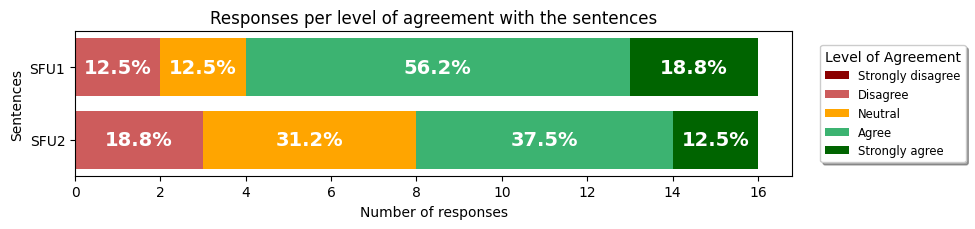

In [24]:
cols_sentences = df.loc[:, 'SFU1':'SFU2']

total_counts = []

for col in cols_sentences.columns:
    responses_count = cols_sentences[col].value_counts().reindex(colors.keys(), fill_value=0)
    total_counts.append(responses_count.values.sum())

plt.figure(figsize=(10, len(cols_sentences.columns) * 1.2))

for i, total_count in enumerate(total_counts):
    left = 0
    for label, color in colors.items():
        count = cols_sentences.iloc[:, i].value_counts().get(label, 0)
        plt.barh(i, count, color=color, left=left, label=label if i == 0 else "", height=0.8)
        
        if count > 0:
            pct = (count / total_count) * 100
            plt.text(left + count / 2, i, f'{pct:.1f}%', ha='center', va='center', color='white', weight='bold', fontsize=14)
        
        left += count if count is not None else 0

plt.xlabel('Number of responses')
plt.ylabel('Sentences')
plt.title('Responses per level of agreement with the sentences')
plt.yticks(range(len(cols_sentences.columns)), cols_sentences.columns)
plt.legend(title='Level of Agreement', loc='center right', bbox_to_anchor=(1.25, 0.5), fancybox=True, shadow=True, fontsize='small')

plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('self-prediction_of_future_use.png')
plt.show()